## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata_df, study_results_df, on = "Mouse ID" )

# Display the data table for preview
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Check the number of mice.
# Group data by mouse ID
group = merge_df.groupby(["Mouse ID"])
group.count()

# Gives you columns with strings of columns (to show Ryan)
# group = pd.DataFrame(group)
# group

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


In [3]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 
dup = pd.DataFrame(group["Timepoint"].value_counts())
dup
dup_loc = dup.loc[dup["Timepoint"] > 1]
print(dup_loc)

# Find data on Mouse ID with duplicate to see if the data should be disregarded
data_dup_mouse = merge_df.loc[merge_df["Mouse ID"] == "g989"]
print(data_dup_mouse)

                    Timepoint
Mouse ID Timepoint           
g989     0                  2
         5                  2
         10                 2
         15                 2
         20                 2
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20  

In [4]:
# Drop any duplicate rows
clean_df = merge_df.drop([908,909,910,911,912,913,914,915,916,917,918,919,920])
clean_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [38]:
# Recheck the number of mice
clean_group_df = pd.DataFrame(clean_df.groupby("Mouse ID").count())
clean_group_df

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,10,10,10,10,10,10,10
a251,10,10,10,10,10,10,10
a262,10,10,10,10,10,10,10
a275,10,10,10,10,10,10,10
a366,7,7,7,7,7,7,7
...,...,...,...,...,...,...,...
z435,3,3,3,3,3,3,3
z578,10,10,10,10,10,10,10
z581,10,10,10,10,10,10,10


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.
# Group the clean data by regimen
aggr = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "sem", "var", "std"]})

aggr.columns = ["Tummor Vol Mean", "Tumor Vol Median", "Tumor Vol SEM", "Tumor Vol Variance", "Tumor Vol Standard Deviation"]

aggr_df = pd.DataFrame(aggr)
aggr_df = aggr_df.reset_index()
aggr_df


,Drug Regimen,Tummor Vol Mean,Tumor Vol Median,Tumor Vol SEM,Tumor Vol Variance,Tumor Vol Standard Deviation
0,Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
1,Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
2,Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
3,Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
4,Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
5,Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
6,Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
7,Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
8,Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419
9,Zoniferol,53.236507,51.818479,0.516398,48.533355,6.966589


## Bar and Pie Charts

           Drug Regimen
Capomulin           230
Ramicane            228
Ketapril            188
Naftisol            186
Zoniferol           182
Placebo             181
Stelasyn            181
Ceftamin            178
Infubinol           178
Propriva            148


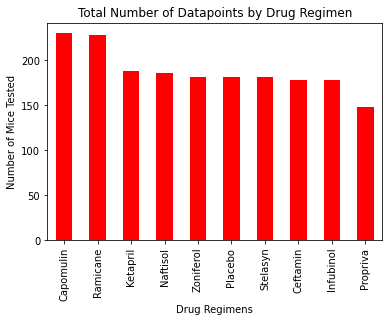

<Figure size 432x288 with 0 Axes>

In [7]:
# Determine datapoints by regimen
datapoints = clean_df["Drug Regimen"].value_counts()
datapoints_df = pd.DataFrame(datapoints)
print(datapoints_df)

# Generate bar plot using Pandas DataFrame.plot
ax = datapoints_df.plot(kind="bar", facecolor="red",legend=False, title = "Total Number of Datapoints by Drug Regimen", 
                   rot = 90)
ax.set_xlabel('Drug Regimens')
ax.set_ylabel('Number of Mice Tested')
plt.show()
# Resize plot to display labels
plt.tight_layout()


  Drug Regimen  Datapoints
0    Capomulin         230
1     Ramicane         228
2     Ketapril         188
3     Naftisol         186
4    Zoniferol         182
5      Placebo         181
6     Stelasyn         181
7     Ceftamin         178
8    Infubinol         178
9     Propriva         148


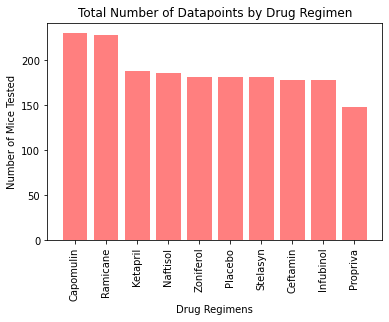

<Figure size 432x288 with 0 Axes>

In [21]:
# Generate identical bar plot using pyplot instead of pandas.

# Rename the columns for matplotlib
datapoints = clean_df["Drug Regimen"].value_counts()
datapoints_df = pd.DataFrame(datapoints)
datapoints_df = datapoints_df.reset_index()
datapoints_df.columns = ["Drug Regimen", "Datapoints"]
print(datapoints_df)

# Generate bar plot using matplotlib
x_axis = np.arange(len(datapoints))
plt.bar(x_axis, datapoints, color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimens')
plt.ylabel('Number of Mice Tested')
plt.title("Total Number of Datapoints by Drug Regimen")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, datapoints_df["Drug Regimen"], rotation = 90)
plt.show()
# Resize plot to display labels
plt.tight_layout()

In [53]:
# Collect data for plot
clean_df
sex_df = pd.DataFrame(clean_df.groupby(["Mouse ID", "Sex"]).count())
sex_df = sex_df.reset_index()
sex_df.Sex.value_counts()
# sex_df["Sex"].value_counts()
# gender = clean_df.groupby("Sex").count()
# gender = pd.DataFrame(gender["Mouse ID"])
# gender_df = gender.rename(columns={"Mouse ID":"Counts"})
# gender_df

# # Generate a pie plot showing the distribution of female versus male mice using pandas
# ax1 = gender_df.plot.pie(y = "Counts")


Male      125
Female    123
Name: Sex, dtype: int64

In [28]:
# Generate identical pie plot using pyplot



## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [12]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.


## Line and Scatter Plots

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin


In [15]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen


## Correlation and Regression

In [16]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


# Observations and Insights